In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pm4py
import numpy as np
import datetime
pd.set_option("display.max_rows", None)
from collections import Counter
import operator
import pickle
import time
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('BPI_Challenge_2012.xes.gz_UNPACKED.csv', index_col=[0])
start = time.time()
df['next_event'] = df['concept:name'].shift(-1)
df['next_case'] = df['case:concept:name'].shift(-1)
df['previous_event'] = df['concept:name'].shift(1)
df['pp_event'] = df['concept:name'].shift(2)
df['ppp_event'] = df['concept:name'].shift(3)
df['p_lifecycle:transition'] = df['lifecycle:transition'].shift(1)
df = df[df['case:concept:name'] == df['next_case']]
df['datetime'] = pd.to_datetime(df['time:timestamp'], errors='coerce', utc=True)
df['day'] = df['datetime'].dt.day
df['hour'] =  df['datetime'].dt.hour
df['minute'] =  df['datetime'].dt.minute
df['month'] =  df['datetime'].dt.month
df = df.iloc[:20000]
df.iloc[:10]
dfx = df[['concept:name', 'previous_event', 'lifecycle:transition', 'pp_event', 'ppp_event', 'p_lifecycle:transition']]
dfy = df[['next_event']]
valy = dfy
dummies = pd.get_dummies(dfx)
dfy = pd.get_dummies(dfy)
dfx = dummies
#dfx = dummies.join(df[['day, hour', 'minute', 'month']])
trainlen = int(len(df)*0.8)
# dfx.iloc[:10]
# dfx = dfx.to_numpy()
# dfy = dfy.to_numpy()
x_train, y_train = dfx[:trainlen], dfy[:trainlen]
x_test, y_test = dfx[trainlen:], dfy[trainlen:]
valy = y_test
#print(x_train.iloc[:10])
columns = y_train.columns
x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)
x_test = tf.convert_to_tensor(x_test)
y_test = tf.convert_to_tensor(y_test)
print(len(df))
df.info()

20000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 20955
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   org:resource            16673 non-null  float64            
 1   lifecycle:transition    20000 non-null  object             
 2   concept:name            20000 non-null  object             
 3   time:timestamp          20000 non-null  object             
 4   case:REG_DATE           20000 non-null  object             
 5   case:concept:name       20000 non-null  int64              
 6   case:AMOUNT_REQ         20000 non-null  int64              
 7   next_event              20000 non-null  object             
 8   next_case               20000 non-null  float64            
 9   previous_event          19999 non-null  object             
 10  pp_event                19998 non-null  object             
 11  ppp_event               19997 non-n

In [4]:

df.iloc[:10]
y_test

<tf.Tensor: shape=(4000, 23), dtype=uint8, numpy=
array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)>

In [5]:
y_test[:1]

<tf.Tensor: shape=(1, 23), dtype=uint8, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0]], dtype=uint8)>

In [6]:
df=df.iloc[:20000]
#df['datetime'] = pd.to_datetime(df['time:timestamp'], errors='raise', format='%Y-%m-%d %H:%M:%S%z')
df.info()
df['datetime'] = pd.to_datetime(df['datetime'], utc=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 20955
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   org:resource            16673 non-null  float64            
 1   lifecycle:transition    20000 non-null  object             
 2   concept:name            20000 non-null  object             
 3   time:timestamp          20000 non-null  object             
 4   case:REG_DATE           20000 non-null  object             
 5   case:concept:name       20000 non-null  int64              
 6   case:AMOUNT_REQ         20000 non-null  int64              
 7   next_event              20000 non-null  object             
 8   next_case               20000 non-null  float64            
 9   previous_event          19999 non-null  object             
 10  pp_event                19998 non-null  object             
 11  ppp_event               19997 non-null  o

In [7]:
# s = df['datetime']
# s3 = pd.to_datetime(s, infer_datetime_format=True)

In [8]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [9]:
y_train[:1]

<tf.Tensor: shape=(1, 23), dtype=uint8, numpy=
array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0]], dtype=uint8)>

In [18]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(x_train.shape[1],1)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(48, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(36, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(23)
])

In [19]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.01383903, -0.01906288, -0.0133308 ,  0.07692963, -0.05046548,
        -0.01982143, -0.03224521, -0.15672666, -0.01143994, -0.01016255,
        -0.01085934, -0.04355076, -0.0868625 ,  0.05766197, -0.08624204,
        -0.05687625, -0.03487319,  0.02124128,  0.04426928, -0.04300556,
        -0.01450052,  0.03613192,  0.011182  ]], dtype=float32)

In [20]:
tf.nn.softmax(predictions).numpy()

array([[0.04368641, 0.0434588 , 0.04370862, 0.0478373 , 0.04211528,
        0.04342584, 0.04288967, 0.03786963, 0.04379134, 0.04384732,
        0.04381678, 0.04240751, 0.04060997, 0.04692442, 0.04063518,
        0.04184616, 0.0427771 , 0.04524614, 0.04630016, 0.04243063,
        0.04365753, 0.04592493, 0.04479328]], dtype=float32)

In [21]:
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [22]:
#loss_fn(y_train[:1], predictions).numpy()

In [23]:
model.compile(optimizer=tf.keras.optimizers.Nadam(
    learning_rate=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam"),
              loss=loss_fn,
              metrics=['accuracy'])

In [24]:
model.fit(x_train, y_train, epochs=6, batch_size=256)

Epoch 1/6
63/63 [==============================] - 3s 25ms/step - loss: 0.0840 - accuracy: 0.7656
Epoch 2/6
63/63 [==============================] - 1s 23ms/step - loss: 0.0364 - accuracy: 0.8325
Epoch 3/6
63/63 [==============================] - 1s 23ms/step - loss: 0.0344 - accuracy: 0.8413
Epoch 4/6
63/63 [==============================] - 1s 23ms/step - loss: 0.0340 - accuracy: 0.8410
Epoch 5/6
63/63 [==============================] - 1s 23ms/step - loss: 0.0327 - accuracy: 0.8426
Epoch 6/6
63/63 [==============================] - 1s 23ms/step - loss: 0.0323 - accuracy: 0.8488


In [25]:
model.evaluate(x_test,  y_test, verbose=2)

125/125 - 1s - loss: 0.0346 - accuracy: 0.8415 - 618ms/epoch - 5ms/step


[0.03457458317279816, 0.8414999842643738]

In [26]:
predictions = model(x_test).numpy()
predictions
tf.nn.softmax(predictions).numpy()

array([[4.2102700e-05, 5.4383709e-04, 2.8734803e-03, ..., 5.9254456e-04,
        9.6108431e-01, 2.0111912e-04],
       [1.7464767e-18, 2.1076347e-17, 2.9199488e-18, ..., 2.7396930e-17,
        2.1644982e-18, 5.6297441e-18],
       [4.9930031e-04, 1.5859348e-05, 3.2919987e-05, ..., 2.2527794e-04,
        2.5242509e-05, 2.2511913e-05],
       ...,
       [2.7357339e-10, 5.6258352e-11, 9.0033969e-10, ..., 3.2613572e-09,
        7.1019180e-12, 6.0581422e-11],
       [1.3954286e-09, 2.8626627e-11, 4.1001664e-12, ..., 1.0000000e+00,
        9.6062609e-11, 2.7446999e-12],
       [3.1605679e-10, 5.2676397e-16, 1.7194240e-13, ..., 2.4570812e-10,
        1.3888731e-12, 9.4316319e-13]], dtype=float32)

In [27]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [28]:
tf.nn.softmax(model.predict(x_train[:2]))

<tf.Tensor: shape=(2, 23), dtype=float32, numpy=
array([[7.72250526e-17, 4.77539229e-16, 7.92496400e-17, 1.46455123e-17,
        1.18704865e-16, 4.21260147e-14, 1.00000000e+00, 6.32528376e-15,
        6.59855871e-17, 4.17895351e-16, 2.42829163e-15, 9.82255367e-19,
        6.23244460e-16, 5.16669542e-18, 7.21127588e-17, 1.79837597e-14,
        4.58149830e-15, 1.24023041e-16, 2.82567399e-13, 5.59080472e-14,
        2.11928660e-15, 1.51806145e-16, 2.39666040e-16],
       [6.02146087e-04, 1.71297925e-05, 3.85855783e-05, 1.48244799e-04,
        1.52414888e-01, 1.57078801e-04, 9.72449925e-06, 4.19596344e-01,
        2.29585330e-05, 2.92779496e-05, 6.38405481e-06, 1.29382067e-06,
        1.54951545e-06, 3.15280595e-05, 3.88062581e-05, 6.49650101e-05,
        4.25276071e-01, 4.32779721e-04, 8.42660724e-04, 8.54621903e-05,
        1.51856308e-04, 1.38241085e-05, 1.64706835e-05]], dtype=float32)>

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 102)               0         
                                                                 
 batch_normalization_4 (Batc  (None, 102)              408       
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 128)               13184     
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 48)               

In [30]:
data = tf.nn.softmax(predictions).numpy()
columns

Index(['next_event_A_ACCEPTED', 'next_event_A_ACTIVATED',
       'next_event_A_APPROVED', 'next_event_A_CANCELLED',
       'next_event_A_DECLINED', 'next_event_A_FINALIZED',
       'next_event_A_PARTLYSUBMITTED', 'next_event_A_PREACCEPTED',
       'next_event_A_REGISTERED', 'next_event_O_ACCEPTED',
       'next_event_O_CANCELLED', 'next_event_O_CREATED',
       'next_event_O_DECLINED', 'next_event_O_SELECTED', 'next_event_O_SENT',
       'next_event_O_SENT_BACK', 'next_event_W_Afhandelen leads',
       'next_event_W_Beoordelen fraude', 'next_event_W_Completeren aanvraag',
       'next_event_W_Nabellen incomplete dossiers',
       'next_event_W_Nabellen offertes', 'next_event_W_Valideren aanvraag',
       'next_event_W_Wijzigen contractgegevens'],
      dtype='object')

In [31]:
df = pd.DataFrame(data, columns=columns)
print(len(df))
df.dropna(inplace=True)
print(len(df))

4000
4000


In [32]:
predictions = pd.DataFrame(df.idxmax(axis=1), columns = ['prediction'])

In [33]:
validation = pd.DataFrame(valy.idxmax(axis=1), columns=['actual'])

In [34]:
validation.reset_index(inplace=True)

In [35]:
results = validation.join(predictions)

In [36]:
results.iloc[:10]

,index,actual,prediction
0,16768,next_event_W_Valideren aanvraag,next_event_W_Valideren aanvraag
1,16770,next_event_A_PARTLYSUBMITTED,next_event_A_PARTLYSUBMITTED
2,16771,next_event_W_Afhandelen leads,next_event_A_PREACCEPTED
3,16772,next_event_W_Afhandelen leads,next_event_W_Afhandelen leads
4,16773,next_event_A_PREACCEPTED,next_event_A_PREACCEPTED
5,16774,next_event_W_Completeren aanvraag,next_event_W_Completeren aanvraag
6,16775,next_event_W_Afhandelen leads,next_event_W_Afhandelen leads
7,16776,next_event_W_Completeren aanvraag,next_event_W_Completeren aanvraag
8,16777,next_event_W_Completeren aanvraag,next_event_W_Completeren aanvraag
9,16778,next_event_W_Completeren aanvraag,next_event_W_Completeren aanvraag


In [37]:
same=0
diff = 0
for value, row in results.iterrows():
    if row['prediction'] == row['actual']:
        same += 1
    else: diff += 1
accuracy = same / (diff+same) *100
accuracy

84.15

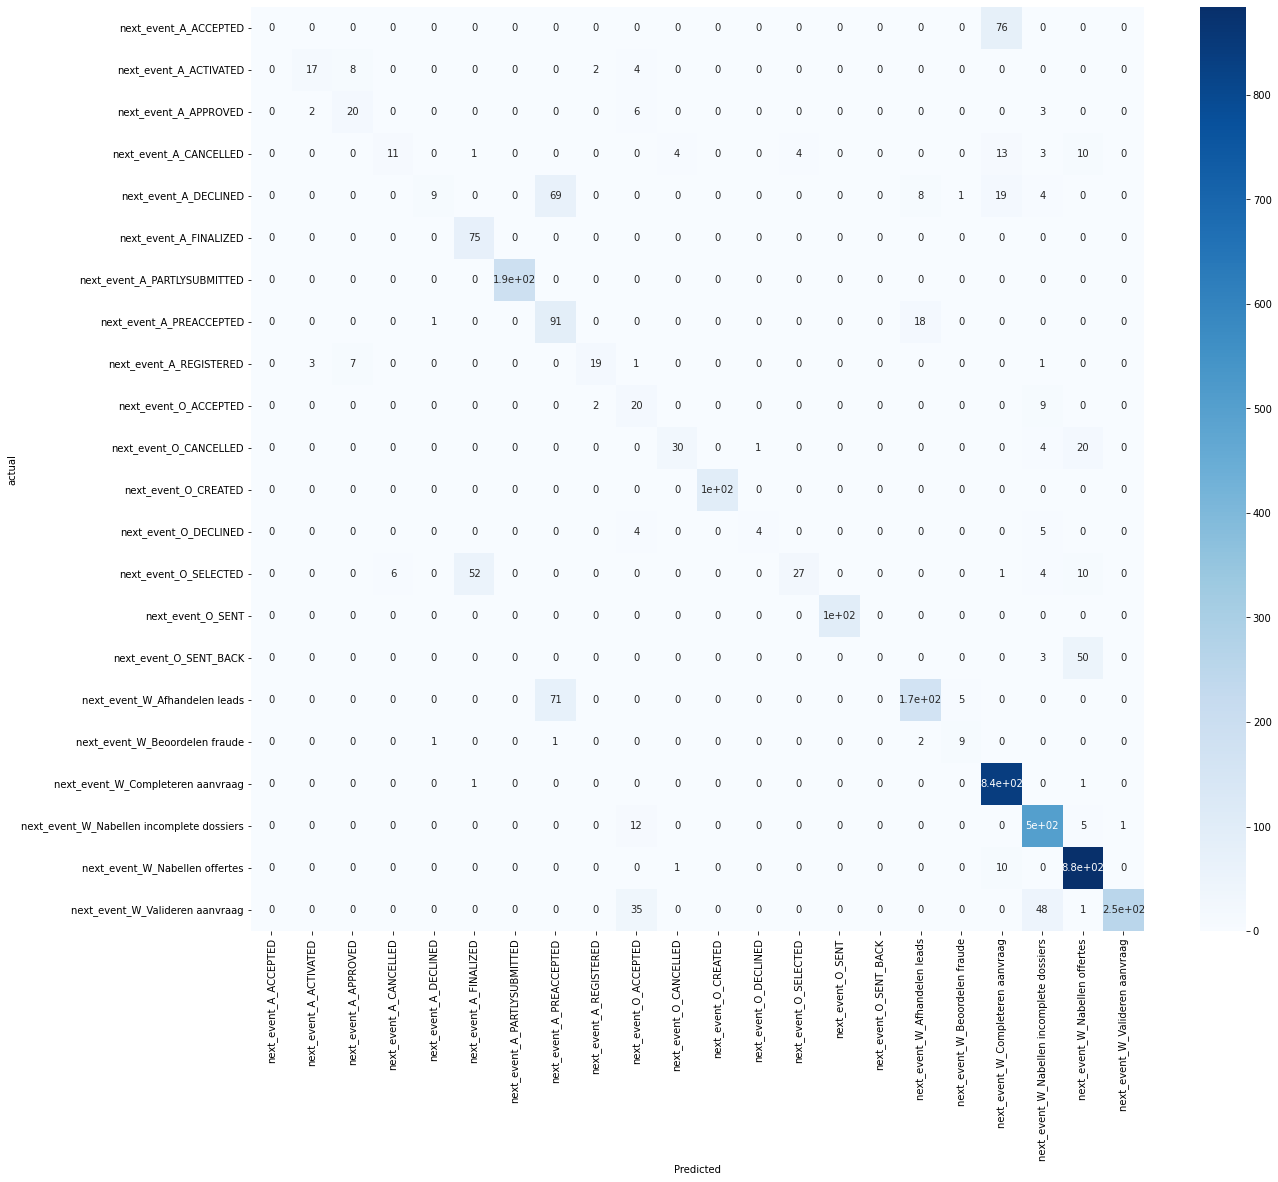

In [38]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
y_test = results['actual']
y_pred = results['prediction']
labels = list(np.unique(results['actual']))
a =  confusion_matrix(y_test, y_pred, labels=labels)
fig, ax = plt.subplots(figsize=(20,17)) 

cmd = pd.DataFrame(a, index=labels, columns=labels)
sns.heatmap(cmd, annot=True, cmap='Blues', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('actual')
fig.savefig('confusionmatrix.png', dpi=300)


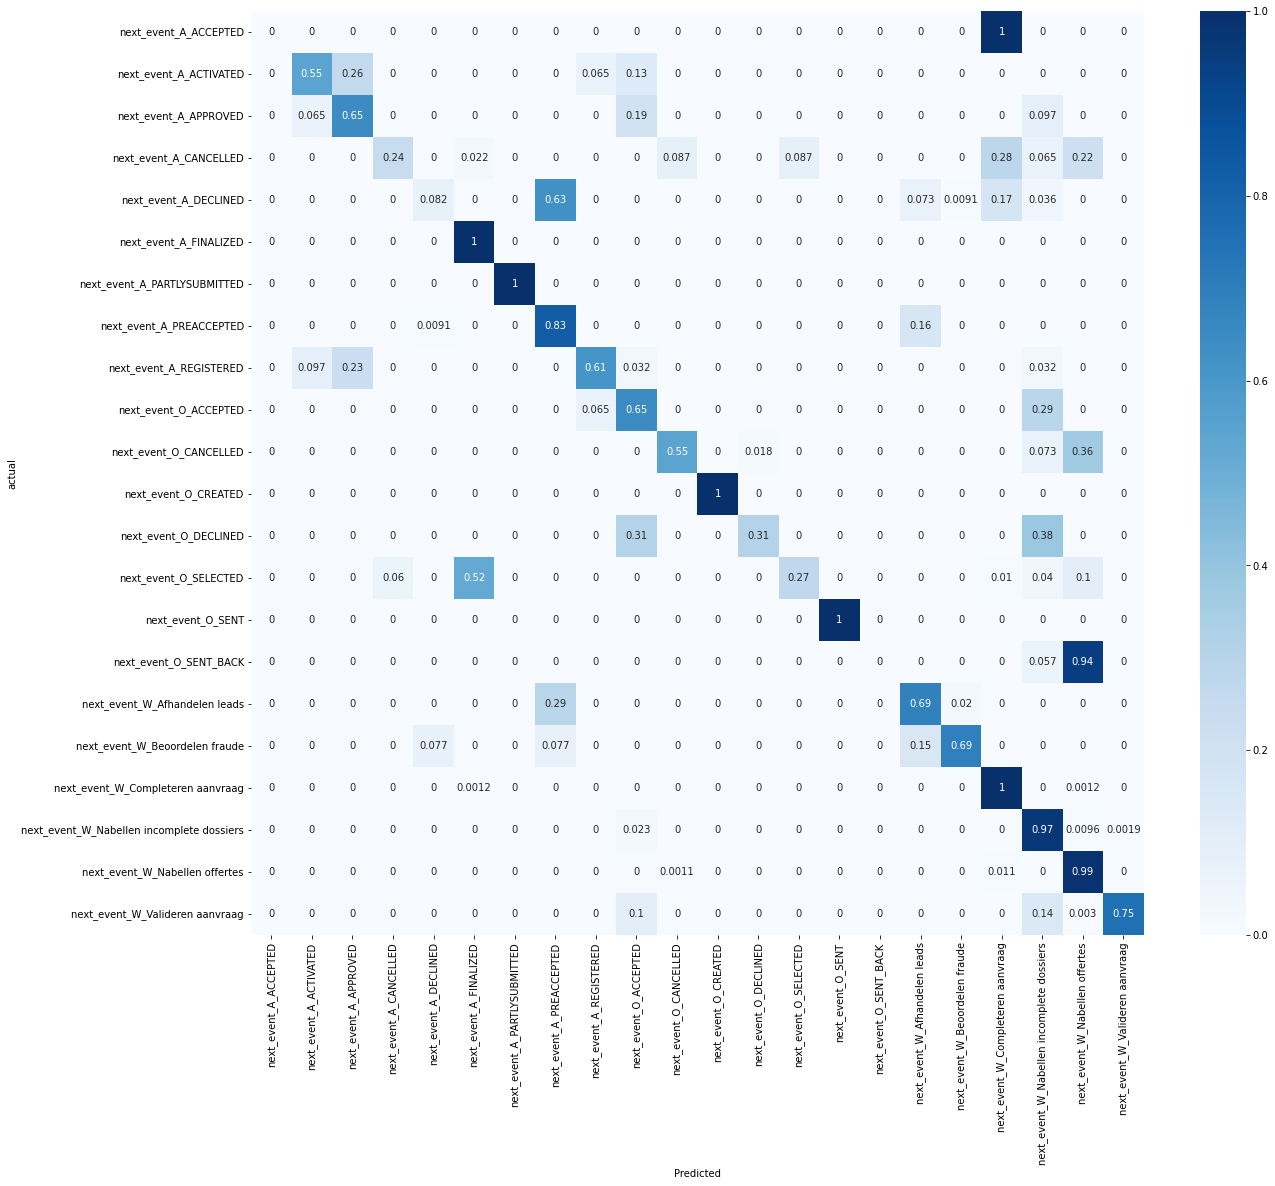

In [39]:
cmdn = cmd.div(cmd.sum(axis=1), axis=0)
cmdn
fig, ax = plt.subplots(figsize=(20,17)) 
sns.heatmap(cmdn, annot=True, cmap='Blues', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('actual')
fig.savefig('norm_confusion_matrix.png', dpi=300)

In [40]:
end = time.time()
total_time = end-start
print(total_time)

80.18330407142639
